# Wavelength calibration

This notebook contains the instructions to process the laboratory data in order to obtain the wavelength calibration for a series.


# Step 0. Adjust headers

The 29 - 33 have the filter from M1 and the order M2.
The header has not been updated to the new convention, so the pipeline will interpret as order 1 instead of order 2.

- Change G_ORD_B to 2
- Add keyword to remind that filter is the M1 filter, not the M2: G_FLT_B = 1


In [8]:
from glob import glob as gb
from astropy.io import fits
import os

rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/'
gcs = [18,19,20,21]

for gc in gcs:
    files = gb(os.path.join(rootdir,'**','*GC'+str(gc)+'*sw.fits'), recursive=True)
    for file in files:
        with fits.open(file, mode='update') as hdl:
            header = hdl[0].header
            header['G_ORD_B'] = 2
            header['G_FLT_B'] = 1

Change name of series of files with wrong name.

In [7]:
import os
from glob import glob as gb
# Change name of files GC8 (1802-1918) into GC9
for i in range(1802,1919):
    files = gb(os.path.join(rootdir,'**','0'+str(i)+'*GC8*w.fits'), recursive=True)
    for f in files:
        newf = f.replace('GC8','GC9')
        os.replace(f, newf)

## Step 1. Data reduction

It is possible to reduce only part of the data by selecting a list of numbers (of the GC, gas cells) names
and limiting to a channel (e.g. 'sw' in the example).

```
from fifipy.wavecal import reduceData
rootdir = '../202002WaveCalData/'
reduceData(rootdir,names=[26],channels=['sw'])
```

Otherwise, the entire reduction can be done in one shot.

In [10]:
from fifipy.wavecal import reduceData
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/'
reduceData(rootdir)


In GC 1 0  there are  134 sw files
number of files  134
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13...
In GC 2 0  there are  217 sw files
number of files  217
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21......
In GC 3 0  there are  251 sw files
number of files  251
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........25
In GC 4 0  there are  217 sw files
number of files  217
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13...

In [12]:
# Change name of 16 (270-356) into 17
# Change name of 26 (1624-1740) into 27
# Remove a few files before and after pattern crashing
import os
from glob import glob as gb
# Change name of files GC16 (270-356) into GC9
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/20220218_185115/'
for i in range(270,357):
    files = gb(os.path.join(rootdir,'**','00'+str(i)+'*GC16*w.fits'), recursive=True)
    for f in files:
        newf = f.replace('GC16','GC17')
        os.replace(f, newf)
        
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/20220218_185115/'
for i in range(1624,1741):
    files = gb(os.path.join(rootdir,'**','0'+str(i)+'*GC26*w.fits'), recursive=True)
    for f in files:
        newf = f.replace('GC26','GC27')
        os.replace(f, newf)


In [13]:
from fifipy.wavecal import reduceData
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/'
reduceData(rootdir, names=[10,11,12,13,14,15,16,17,22,23,24,25,26,27,28,29,30,31,32,33])


In GC 10 0  there are  201 sw files
number of files  201
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20
In GC 11 0  there are  284 sw files
number of files  284
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........25.........26.........27.........28...
In GC 12 0  there are  351 sw files
number of files  351
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........25.........26.........27.........28.........29

KeyboardInterrupt: 

In [14]:
from fifipy.wavecal import reduceData
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/'
reduceData(rootdir, names=[16,17,22,23,24,25,26,27,28,29,30,31,32,33], channels=['lw'])


In GC 16 0  there are  134 lw files
number of files  134
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13...
In GC 16 1  there are  180 lw files
number of files  180
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........
In GC 17 0  there are  87 lw files
number of files  87
0.........1.........2.........3.........4.........5.........6.........7.........8......
In GC 22 0  there are  134 lw files
number of files  134
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13...
In GC 23 0  there are  217 lw files
number of files  217
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15....

## Step 2. Check the coverage

Plot the central pixel of the central spaxel for the different combinations.

Solid line is dichroic 130, dashed line is dichroic 105.

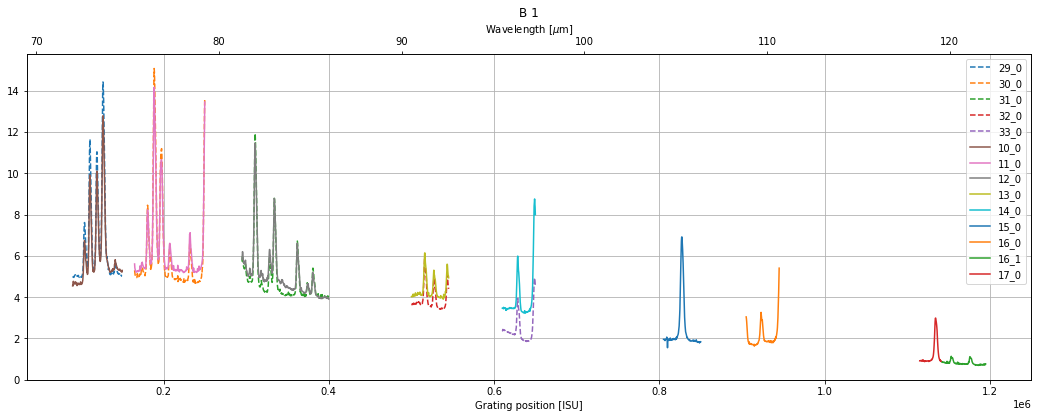

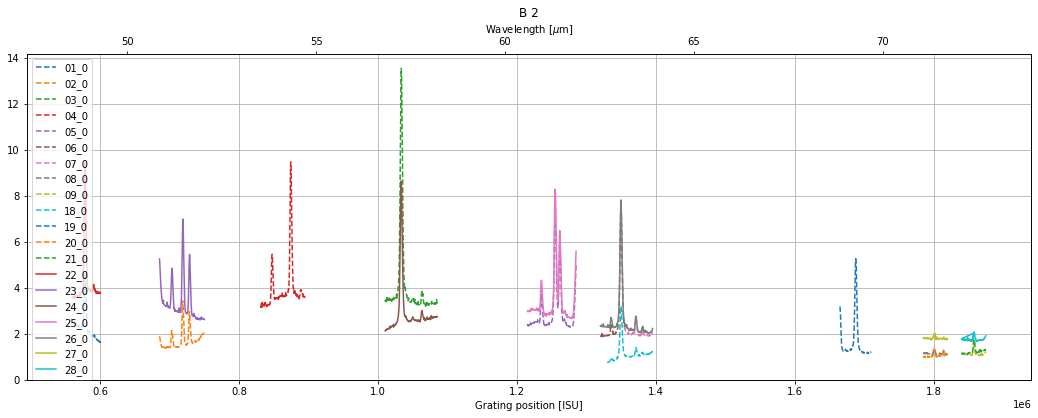

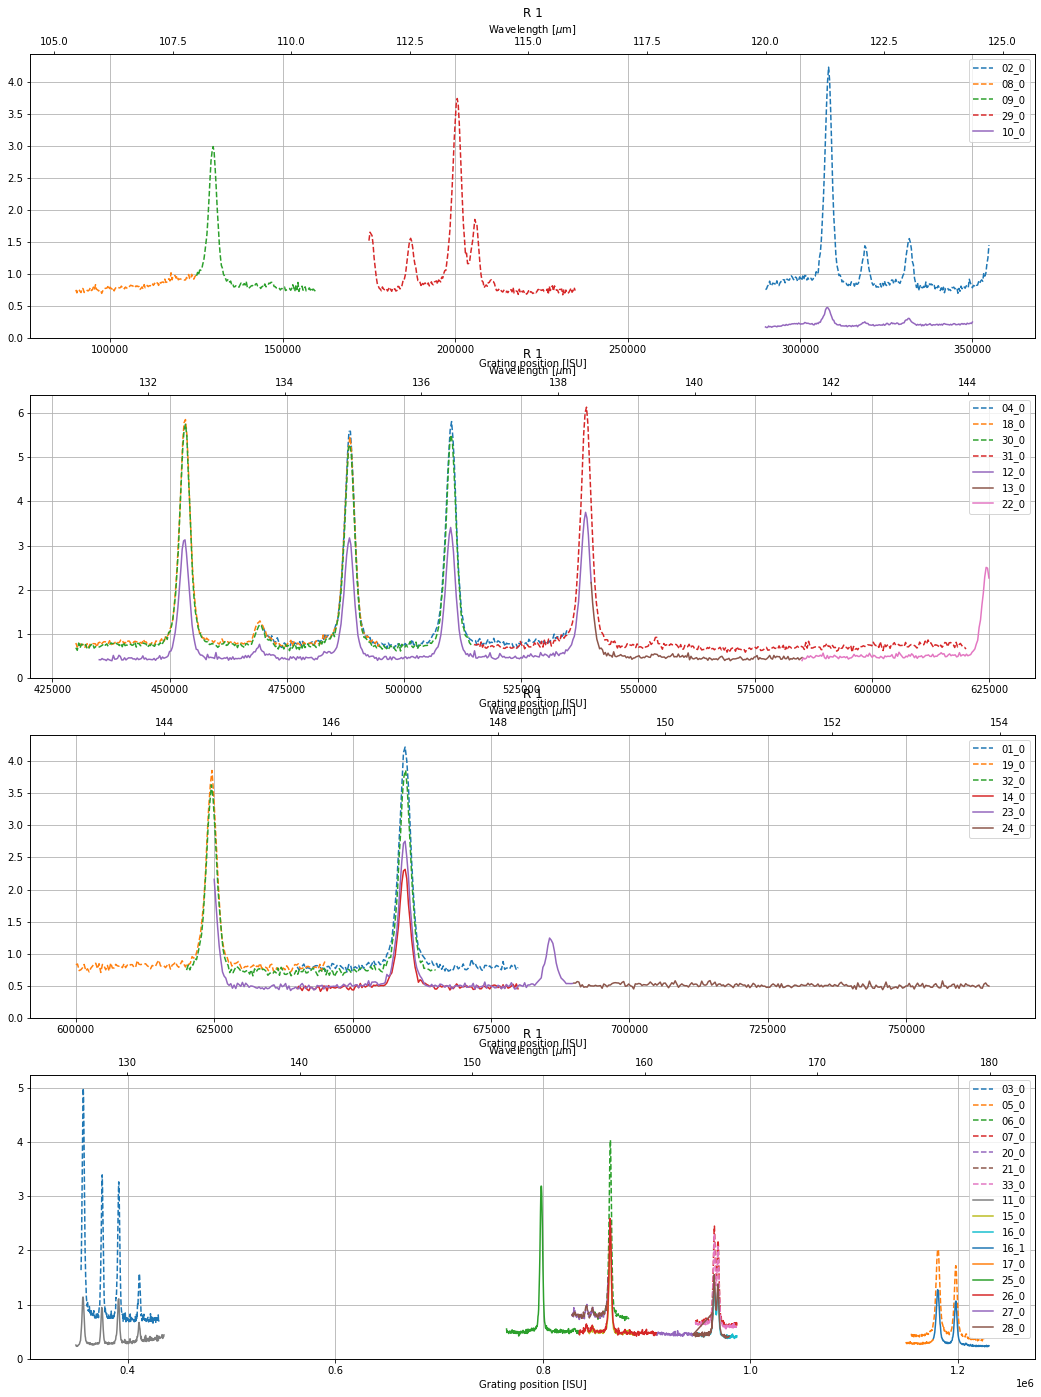

In [15]:
%matplotlib inline
from fifipy.wavecal import plotLines

rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/'
plotLines(rootdir,'B',1)
plotLines(rootdir,'B',2)
plotLines(rootdir,'R',1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


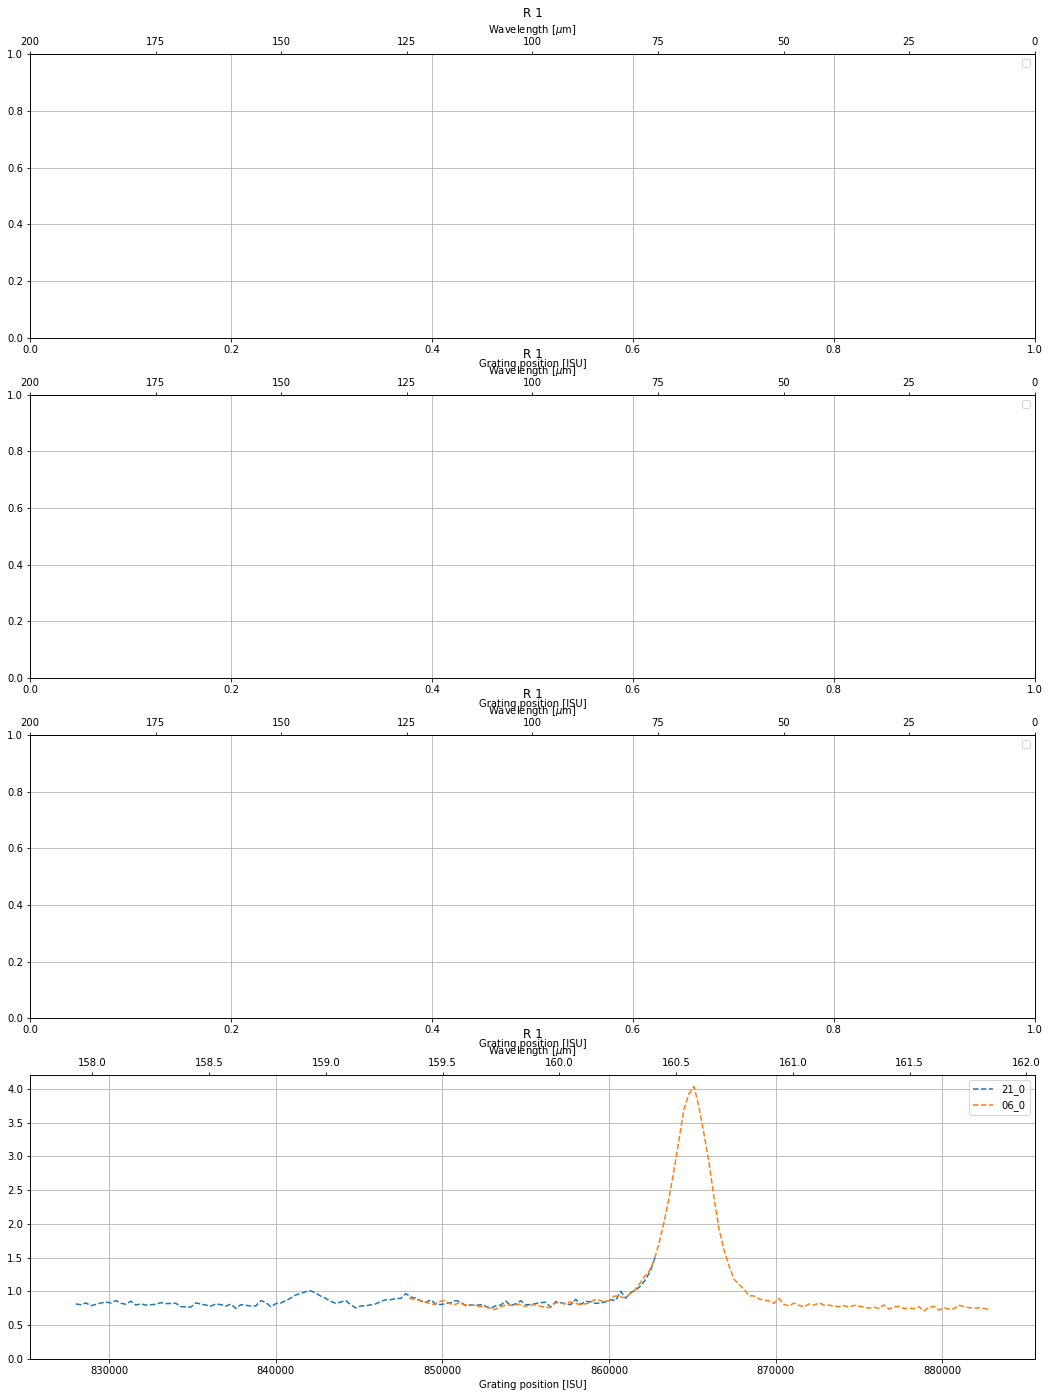

In [16]:
%matplotlib inline
from fifipy.wavecal import plotLines

rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/'
plotLines(rootdir,'R',1, files = [rootdir+'Reduced/R1_105_GC21_0.fits',rootdir+'Reduced/R1_105_GC06_0.fits'])


## Step 3. Merge files

In same cases an observation is done in two parts. These cases have to be merged before fitting the lines, otherwise the fitting is difficult and incorrect in some pixels.

In this case the blue seems OK.
The red has a few mergings:
- B    6_0 +  7_0 ->  6_1
- R    8_0 +  9_0 ->  8_1
- R   12_0 + 13_0 -> 12_1
- R   22_0 + 23_0 -> 22_1
- R   22_1 + 24_0 -> 22_2
- R    6_0 + 21_0 ->  6_1

In [17]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/'
infile1 = rootdir + 'B2_105_GC06_0.fits'
infile2 = rootdir + 'B2_105_GC07_0.fits'
outfile = rootdir + 'B2_105_GC06_1.fits'
mergeFiles(infile1, infile2, outfile)

In [18]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/'
infile1 = rootdir + 'R1_105_GC08_0.fits'
infile2 = rootdir + 'R1_105_GC09_0.fits'
outfile = rootdir + 'R1_105_GC08_1.fits'
mergeFiles(infile1, infile2, outfile)

In [19]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/'
infile1 = rootdir + 'R1_130_GC12_0.fits'
infile2 = rootdir + 'R1_130_GC13_0.fits'
outfile = rootdir + 'R1_130_GC12_1.fits'
mergeFiles(infile1, infile2, outfile)

In [20]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/'
infile1 = rootdir + 'R1_130_GC22_0.fits'
infile2 = rootdir + 'R1_130_GC23_0.fits'
outfile = rootdir + 'R1_130_GC22_1.fits'
mergeFiles(infile1, infile2, outfile)

In [21]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/'
infile1 = rootdir + 'R1_130_GC22_1.fits'
infile2 = rootdir + 'R1_130_GC24_0.fits'
outfile = rootdir + 'R1_130_GC22_2.fits'
mergeFiles(infile1, infile2, outfile)

Move unused files away.

In [22]:
import os
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/'
os.mkdir(rootdir+'OLD')

files = [
    'B2_105_GC06_0.fits',
    'B2_105_GC07_0.fits',
    'R1_105_GC08_0.fits',
    'R1_105_GC09_0.fits',
    'R1_130_GC12_0.fits',
    'R1_130_GC13_0.fits',
    'R1_130_GC22_0.fits',
    'R1_130_GC23_0.fits',
    'R1_130_GC22_1.fits',
    'R1_130_GC24_0.fits',
#    'R1_105_GC06_0.fits',
    'R1_105_GC21_0.fits',
#    'B2_105_GC08_0.fits',
#    'B2_105_GC08_1.fits',
#    'B2_130_GC26_1.fits',
#    'B2_130_GC28_0.fits',
]


for file in files:
    os.rename(rootdir+file, rootdir + 'OLD/'+file)

Double check

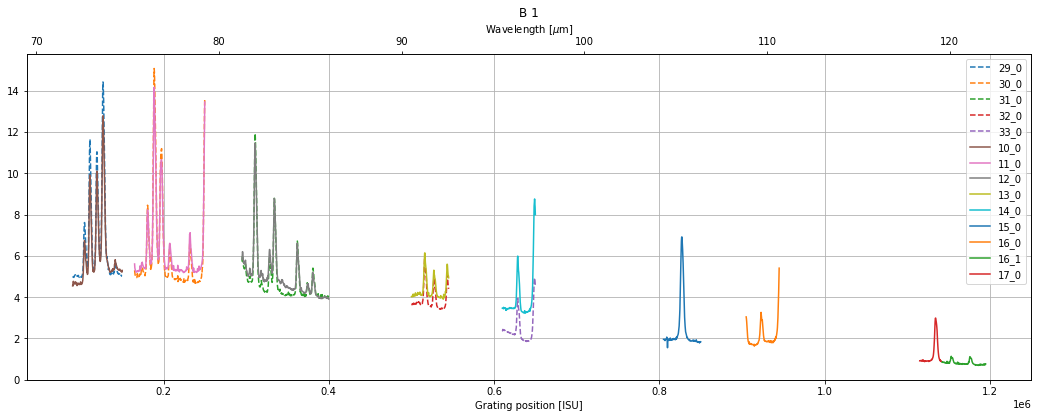

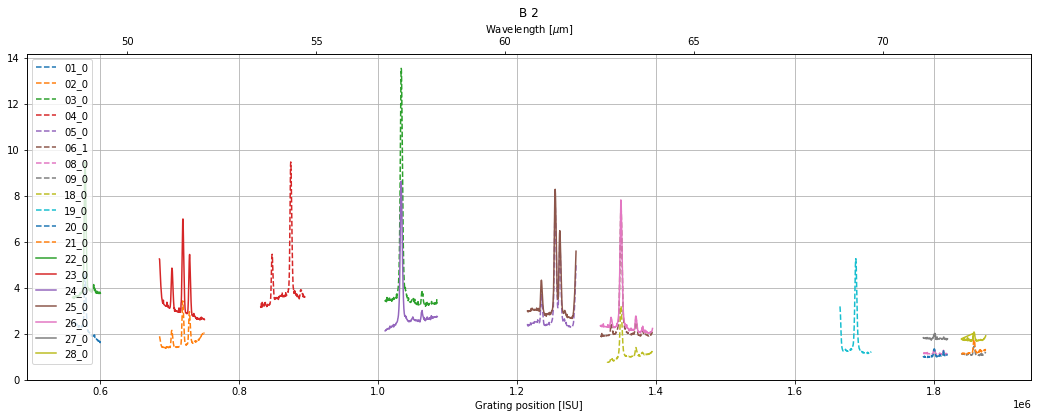

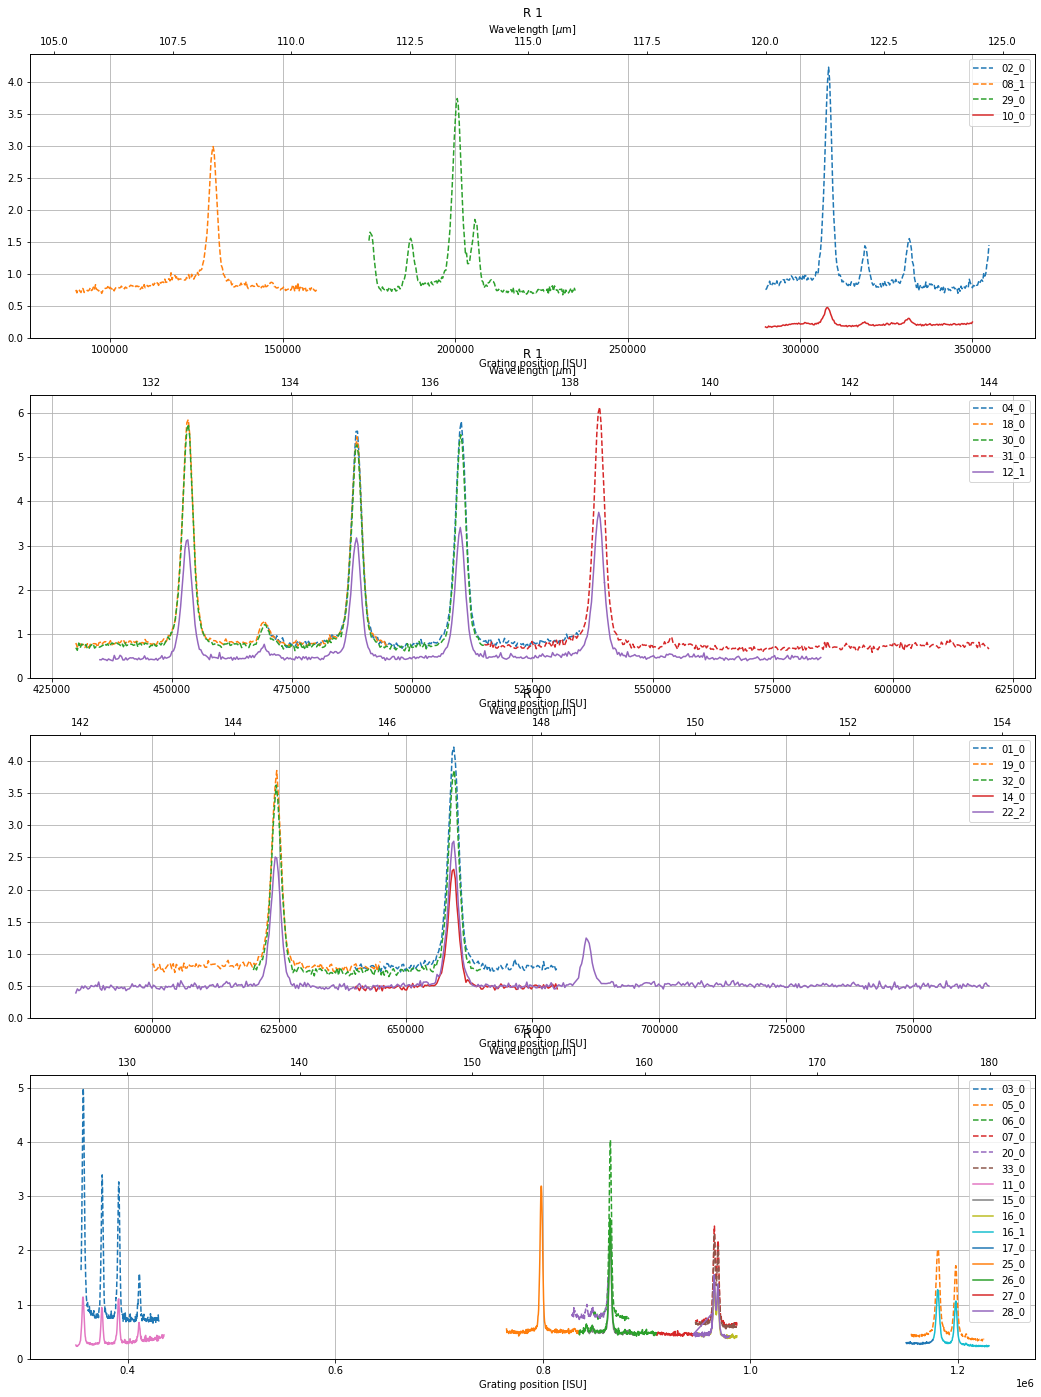

In [23]:
%matplotlib inline
from fifipy.wavecal import plotLines

rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/'
plotLines(rootdir,'B',1)
plotLines(rootdir,'B',2)
plotLines(rootdir,'R',1)

## Step 4. Fit the cubes

It is possible to fit a single cube and show the results.

```
%matplotlib inline
from fifipy.wavecal import fitData
rootdir = '../202002WaveCalData/Reduced/' 
infile = rootdir + 'R1_105_GC33_0.fits'
fitData(infile, plot=True)
```
Otherwise, the entire fitting can be done in one shot.
The results are conserved in pdf files with the same names which can be inspected to check the quality of the fits.

In [24]:
# Fit of all the data
from fifipy.wavecal import fitData
from glob import glob as gb
import os 
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/'
infiles = gb(os.path.join(rootdir,'*.fits'))
nfiles = len(infiles)
for k, infile in enumerate(infiles):
    print(str(nfiles-k)+' '+infile+' ', end='')
    fitData(infile, plot=False)
    print('')

62 /home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/B2_105_GC05_0.fits BLUE 2   ................
61 /home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/B2_105_GC04_0.fits BLUE 2   ................
60 /home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/B2_105_GC09_0.fits BLUE 2   ................
59 /home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/R1_105_GC08_1.fits RED 1   ................
58 /home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/R1_130_GC26_0.fits RED 1   ................
57 /home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/R1_105_GC06_0.fits RED 1   ................
56 /home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/B1_105_GC33_0.fits BLUE 1   ................
55 /home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/B2_130_GC27_0.fits BLUE 2   ................
54 /home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/B2_105_GC01_0.fits BLUE 2   ................
53 /home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/R1_105_GC18_0.fits RED 1   ................
52 /

##  Step 5. Fit the parameters

- For each case, run first the calibration with all free parameters (ISOFF is treated like a Gaussian with 3 params).
- Then fix the parameters to the best values except for ISOFF.
- Run the fit for each spaxel independently.

### R 105

Number of files  16


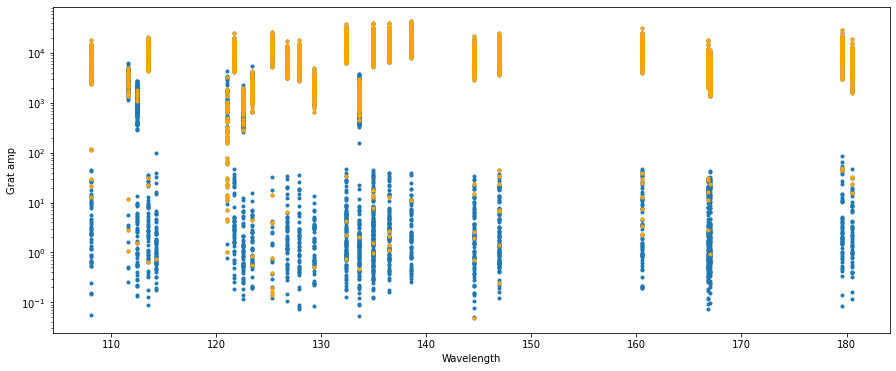

Number of files  16


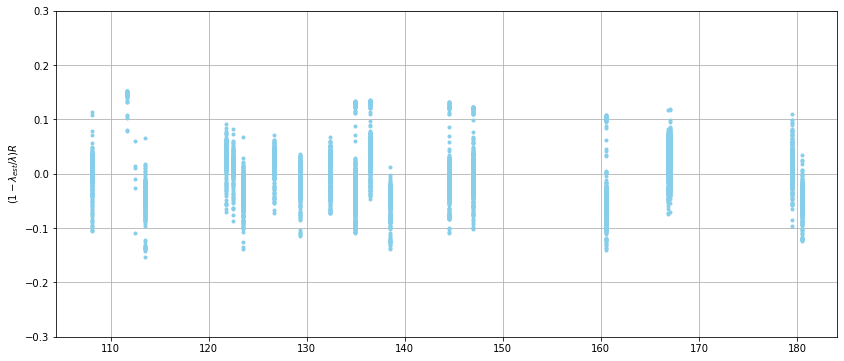

NP =  14.36394901806165
g0 =  0.1171628165332266
a  =  424.4860714479456
PS =  0.0005837327627620625
QS =  1.962541480331001e-06
QOFF =  6.229685338225162

ai =  6.431829211495482
bi =  -163.48648930687588
ci =  1151042.045448849


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/'
channel = 'R'
order = '1'
dichroic = '105'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)
fig = plt.subplots(figsize=(15,6))
plt.plot(wavepos, gratamp,'.')
idx = (gerrpos < 100) 
plt.plot(wavepos[idx], gratamp[idx],'.',color='orange')
plt.ylabel('Grat amp')
plt.xlabel('Wavelength')
plt.yscale('log')
plt.show()

# Total fit
channel = 'R'
order = 1
dichroic = 105
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order, dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'R', '105', g0, NP, a, ai, bi, ci, PS, QS, QOFF)

# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1150987.175,
1151124.260,nan,1151461.228,1151642.714,
1150351.927,1150410.522,1150506.261,1150597.463,
nan,1149974.660,1149970.751,1149995.529,
1150002.171,1150108.704,1150237.575,1150141.834,
1150073.606,1150001.949,1150101.825,nan,
1150796.478,1150644.401,1150487.300,1150510.308]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1150987.17545441 1151124.25993035 1151301.34029085 1151461.22830459
 1151642.71368529 1150351.92650955 1150410.52198144 1150506.26127617
 1150597.46278226 1150766.42556619 1149974.65972625 1149970.75060265
 1149995.5288979  1150002.17056489 1150108.70443913 1150237.57491174
 1150141.83413956 1150073.60555089 1150001.94949436 1150101.82544363
 1150937.03335567 1150796.47789869 1150644.40094393 1150487.30032375
 1150510.30753495]


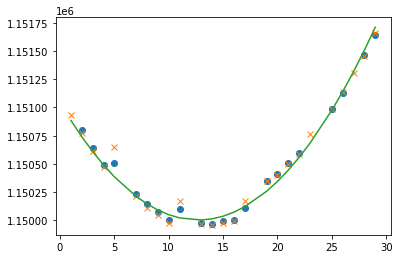

In [26]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.36394901806165
g0 =  0.1171628165332266
a  =  424.4860714479456
PS =  0.0005837327627620625
QS =  1.962541480331001e-06
QOFF =  6.229685338225162

# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'R',1
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))
#ai,bi,ci = fitISOFF(ISOFF, channel, dichroic, order)

# Plot ISOFF vs fit
ai =  6.431829211495482
bi =  -163.48648930687588
ci =  1151042.045448849
red105 = [ -7.82734595,    6.48103643,   15.37344189,   47.39558183,   54.25017651,
              -87.78073561,  -57.87672198,  -57.02387395,  -30.75647953,  -82.13171852,
               38.17407445,   53.9293801 ,   62.15816713,   82.60265586,  -51.04419029,
               -6.0626937,   36.28682384,   42.49162215,   70.33355788, -148.78530207,
              -52.04256692 , -29.12922045,   -4.73520485,   20.72545992, -268.51481606]

x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - red105
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0167200
R105_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF]


### R 130

Number of files  13
Number of files  13


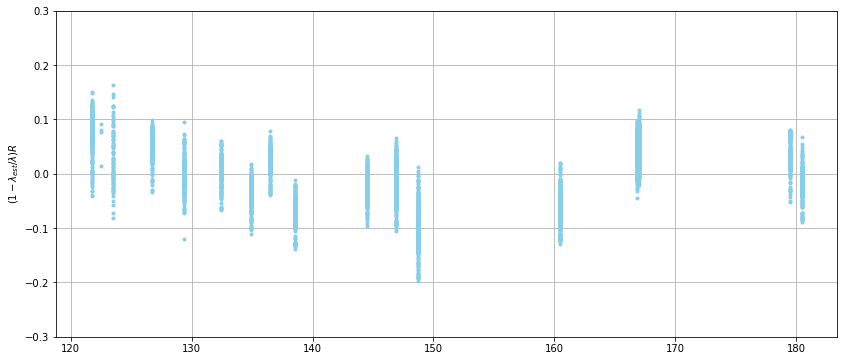

NP =  14.303949142437581
g0 =  0.1171494970707729
a  =  426.3720057820686
PS =  0.0005872429522951287
QS =  1.3194933179667486e-06
QOFF =  5.77998032199762

ai =  6.340397707952957
bi =  -160.0592234265399
ci =  1151377.7870828102


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/'
channel = 'R'
order = '1'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

# Total fit
channel = 'R'
order = 1
dichroic = 130
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order,dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'R', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)

# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1151352.872,
1151475.763,nan,1151824.462,1152007.864,
1150718.944,1150776.749,1150882.590,1150966.167,
nan,1150343.198,1150334.805,1150364.927,
1150378.290,1150464.099,1150582.145,1150489.520,
1150433.931,1150360.028,1150446.496,nan,
1151135.899,1150986.770,1150841.783,1150839.159]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1151352.87196306 1151475.76278089 1151659.80630478 1151824.46240114
 1152007.86369641 1150718.94389937 1150776.7491854  1150882.58996372
 1150966.16662629 1151119.4926711  1150343.19751467 1150334.80522541
 1150364.92694381 1150378.28951338 1150464.09854046 1150582.1448923
 1150489.51994417 1150433.93130626 1150360.02848542 1150446.49590325
 1151271.94362249 1151135.89879797 1150986.77028902 1150841.78328955
 1150839.15856971]


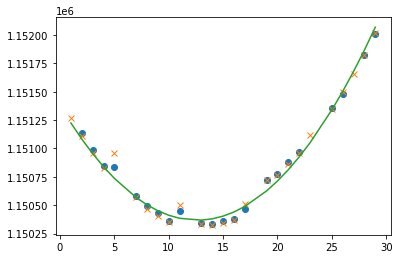

In [28]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.303949142437581
g0 =  0.1171494970707729
a  =  426.3720057820686
PS =  0.0005872429522951287
QS =  1.3194933179667486e-06
QOFF =  5.77998032199762


# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'R',1
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))

# Plot ISOFF vs fit
ai =  6.340397707952957
bi =  -160.0592234265399
ci =  1151377.7870828102

red130 = [ -12.70859072,    7.50024661,   18.53167461,   41.46400465,   52.7757175,
              -95.78015715,  -56.53938436,  -54.24399594,  -33.75992799,  -68.99733959,
               31.27967525,   53.60554151,   58.10103624,   71.69960587,  -22.11761283,
               -4.64846212 ,  38.77585613,   42.34325365,   60.40053434, -118.02749666,
              -47.8753654 ,  -24.45939546,   -4.54977914,    8.74871326, -223.38722927]

x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - red130
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0167200
R130_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF]


### B 1

Number of files  14
Number of files  14


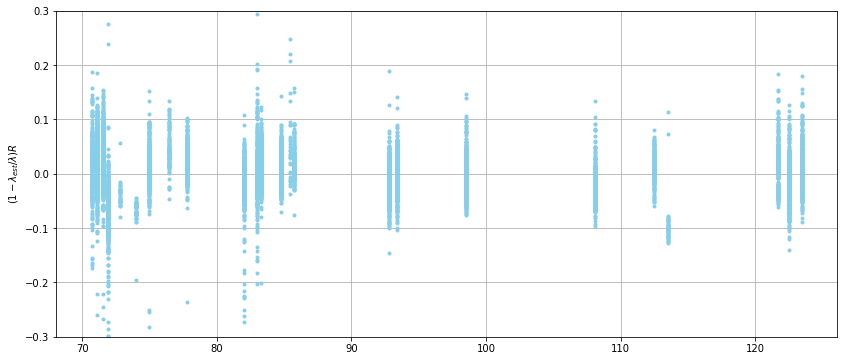

NP =  13.713632354954372
g0 =  0.08265617324801047
a  =  893.8674339791459
PS =  0.0005575234327820841
QS =  9.655105885723963e-06
QOFF =  6.753484718475011

ai =  1.9448619713563782
bi =  -47.686915553855904
ci =  1075248.0600576168


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/'
channel = 'B'
order = '1'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

# Total fit
channel = 'B'
order = 1
dichroic = 130
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order, dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'B1', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)
# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1075575.308,
1075337.272,1075342.613,1075360.888,1075111.809,
1075254.097,1075073.603,1075093.902,1075086.306,
1074898.300,1075135.988,1074975.497,1074936.510,
1074950.201,1074819.995,1075073.411,1074933.282,
1074883.507,1074909.576,1074778.233,1075332.782,
1075128.462,1075090.264,1075092.068,1074918.316]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1075575.3081717  1075337.27206647 1075342.61262443 1075360.88768521
 1075111.80893304 1075254.09733165 1075073.60340603 1075093.90157624
 1075086.30597135 1074898.29996094 1075135.98789014 1074975.49706435
 1074936.50973473 1074950.20113768 1074819.99532646 1075073.41135229
 1074933.28235058 1074883.50659771 1074909.57630424 1074778.232845
 1075332.78171682 1075128.46152253 1075090.26404477 1075092.06792475
 1074918.31573177]


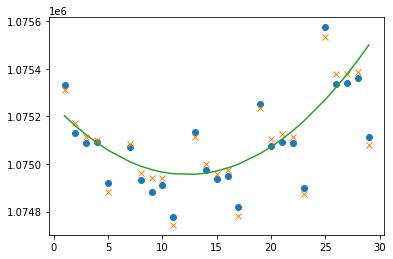

In [30]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  13.713632354954372
g0 =  0.08265617324801047
a  =  893.8674339791459
PS =  0.0005575234327820841
QS =  9.655105885723963e-06
QOFF =  6.753484718475011

# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'B',1
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))

# Plot ISOFF vs fit
ai =  1.9448619713563782
bi =  -47.686915553855904
ci =  1075248.0600576168

blue1 = [-263.92944121,  -53.59084654,    1.16697799,   51.19513828,  422.65026353,
             -189.63033763,  -33.17725668,  -19.96267952,   26.01302266,  307.31828786,
             -156.31979898,  -37.76920495,   14.25657713,    9.02851029,  216.42404114,
              -75.57154681,   28.56399698,   33.54483603,   24.91445915,  215.17805003,
             -108.48468372,  -12.59286879,    6.90170244,  -10.74710888,  175.93175233]

x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - blue1
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0089008
B1_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]


### B 2

Number of files  19
Number of files  19


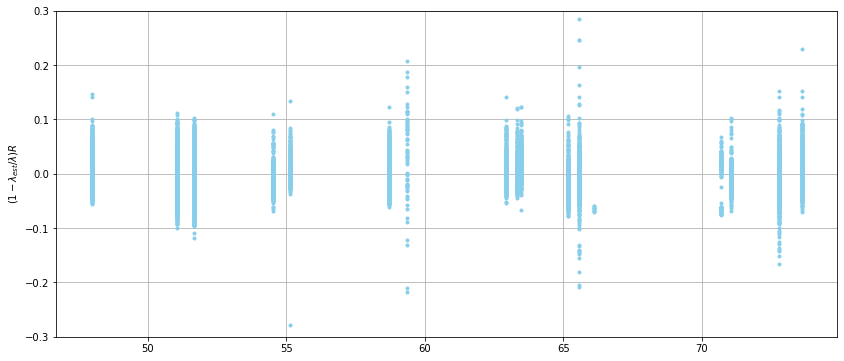

NP =  14.625761439000895
g0 =  0.08266132133702375
a  =  829.1569651741386
PS =  0.0005604105504835287
QS =  7.244253337556655e-06
QOFF =  6.501570724859886

ai =  2.0331563922536446
bi =  -52.500838126932194
ci =  1075215.5135363748


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/Reduced/'
channel = 'B'
order = '2'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

# Total fit
channel = 'B'
order = 2
dichroic = 130
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order,dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'B2', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)
# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1075354.214,
1075246.789,1075259.151,1075273.839,1074986.764,
1075081.454,1074995.319,1075034.309,1075025.152,
1074767.672,1074989.908,1074898.530,1074874.335,
1074890.415,1074680.646,1074980.911,1074884.451,
1074849.728,1074851.092,1074648.155,1075238.121,
1075110.351,1075046.954,1075047.516,1074799.607]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1075354.21420274 1075246.78850475 1075259.15093443 1075273.83900697
 1074986.76442951 1075081.45425395 1074995.31882868 1075034.30880585
 1075025.1522842  1074767.67235986 1074989.90820677 1074898.53010755
 1074874.3350772  1074890.41506821 1074680.64559192 1074980.9110837
 1074884.45141259 1074849.72767675 1074851.09182112 1074648.15524217
 1075238.12069629 1075110.35137016 1075046.95370296 1075047.51601729
 1074799.60728953]


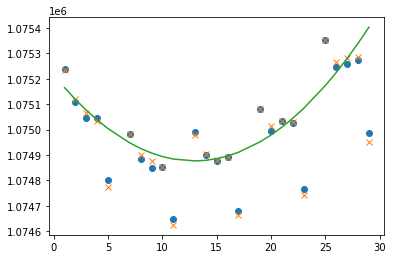

In [32]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.625761439000895
g0 =  0.08266132133702375
a  =  829.1569651741386
PS =  0.0005604105504835287
QS =  7.244253337556655e-06
QOFF =  6.501570724859886

# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'B',2
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))

# Plot ISOFF vs fit
ai =  2.0331563922536446
bi =  -52.500838126932194
ci =  1075215.5135363748

blue2 = [-1.80111492e+02, -4.09611668e+01,  1.78797557e-02,  5.33911505e+01,
              4.51898768e+02, -1.28648267e+02, -3.41402874e+01, -2.58367960e+01,
              1.51806221e+01,  3.40600043e+02, -1.00297089e+02, -2.52445624e+01,
              4.35994998e+00,  3.34233424e+00,  2.48134145e+02, -3.43214702e+01,
              2.64531668e+01,  2.99021981e+01,  4.11197888e+01,  2.59380351e+02,
             -6.88399816e+01, -1.68668733e-01,  1.23190431e+01,  3.38400050e+00,
              2.28956503e+02]
x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - blue2
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0089008
B2_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]

# Output

In [33]:
# Print the parameters (Old style)
print(',2202,,,')
header = ',Red D105,    Red D130,   Blue 1st Order,Blue 2nd Order'
print(header)
parametes  = ['g0','NP','a','ISF','gamma','PS','QOFF','QS','ISOFF'] 
for r105, r130, b1, b2 in zip(R105_pars[:-1], R130_pars[:-1], B1_pars[:-1], B2_pars[:-1]):
    print(',{0:.5e}, {1:.5e}, {2:.5e}, {3:.5e}'.format(r105, r130, b1 ,b2))
for i, (r105, r130, b1, b2) in enumerate(zip(R105_pars[-1], R130_pars[-1], B1_pars[-1], B2_pars[-1])):
    print(',{1:.3f}, {2:.3f}, {3:.3f}, {4:.3f}'.format(i,r105, r130, b1, b2))

,2202,,,
,Red D105,    Red D130,   Blue 1st Order,Blue 2nd Order
,1.17163e-01, 1.17149e-01, 8.26562e-02, 8.26613e-02
,1.43639e+01, 1.43039e+01, 1.37136e+01, 1.46258e+01
,4.24486e+02, 4.26372e+02, 8.93867e+02, 8.29157e+02
,1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00
,1.67200e-02, 1.67200e-02, 8.90080e-03, 8.90080e-03
,5.83733e-04, 5.87243e-04, 5.57523e-04, 5.60411e-04
,6.22969e+00, 5.77998e+00, 6.75348e+00, 6.50157e+00
,1.96254e-06, 1.31949e-06, 9.65511e-06, 7.24425e-06
,1150987.175, 1151352.872, 1075575.308, 1075354.214
,1151124.260, 1151475.763, 1075337.272, 1075246.789
,1151301.340, 1151659.806, 1075342.613, 1075259.151
,1151461.228, 1151824.462, 1075360.888, 1075273.839
,1151642.714, 1152007.864, 1075111.809, 1074986.764
,1150351.927, 1150718.944, 1075254.097, 1075081.454
,1150410.522, 1150776.749, 1075073.603, 1074995.319
,1150506.261, 1150882.590, 1075093.902, 1075034.309
,1150597.463, 1150966.167, 1075086.306, 1075025.152
,1150766.426, 1151119.493, 1074898.300, 1074767.672

# New Output

In [38]:
date = '20220201'
print('# 2202')
channel = 'R105'
fmt = '{0:s} {1:s} {2:.9f} {3:.8f} {4:.7f} {5:.9f} {6:.9f} {7:.5e} '+\
'{8:.3f} {9:.3f} {10:.3f} {11:.3f} {12:.3f} {13:.3f} {14:.3f} {15:.3f} {16:.3f} {17:.3f} '+\
'{18:.3f} {19:.3f} {20:.3f} {21:.3f} {22:.3f} {23:.3f} {24:.3f} {25:.3f} {26:.3f} {27:.3f} '+\
'{28:.3f} {29:.3f} {30:.3f} {31:.3f} {32:.3f}'

#print(fmt.format(date, channel, R105_pars[:3], R105_pars[5:8], np.array(R105_pars[-1])))
channels = ['R105', 'R130', 'B1  ', 'B2  ']
data = [R105_pars, R130_pars, B1_pars, B2_pars]

for channel, d in zip(channels, data):
    print('{0:s} {1:s} '.format(date, channel), end='')
    print('{0:.9f}  {1:.8f}  {2:.7f}  '.format(d[0], d[1], d[2]), end='')
    print('{0:.9f}  {1:.9f}  {2:.5e}  '.format(d[5], d[6], d[7]), end='')
    for r in d[-1]:
        print('{0:.3f}  '.format(r), end='')
    print()

# 2202
20220201 R105 0.117162817  14.36394902  424.4860714  0.000583733  6.229685338  1.96254e-06  1150987.175  1151124.260  1151301.340  1151461.228  1151642.714  1150351.927  1150410.522  1150506.261  1150597.463  1150766.426  1149974.660  1149970.751  1149995.529  1150002.171  1150108.704  1150237.575  1150141.834  1150073.606  1150001.949  1150101.825  1150937.033  1150796.478  1150644.401  1150487.300  1150510.308  
20220201 R130 0.117149497  14.30394914  426.3720058  0.000587243  5.779980322  1.31949e-06  1151352.872  1151475.763  1151659.806  1151824.462  1152007.864  1150718.944  1150776.749  1150882.590  1150966.167  1151119.493  1150343.198  1150334.805  1150364.927  1150378.290  1150464.099  1150582.145  1150489.520  1150433.931  1150360.028  1150446.496  1151271.944  1151135.899  1150986.770  1150841.783  1150839.159  
20220201 B1   0.082656173  13.71363235  893.8674340  0.000557523  6.753484718  9.65511e-06  1075575.308  1075337.272  1075342.613  1075360.888  1075111.809  

In [41]:
# Write an output file with all the parameters [Old format]
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/'
with open(rootdir+'parameters.csv', 'w') as f:
    f.write('date, channel, g0,NP,a,ISF,gamma,PS,QOFF,QS,')
    for i in range(1,25):
        f.write('ISOFF'+str(i)+',')
    f.write('ISOFF25\n')
    f.write('# 2202\n')
    for channel, pars in zip(['R105','R130','B1','B2'], [R105_pars, R130_pars, B1_pars, B2_pars]):
        f.write('20220201, '+channel)
        for p in pars[:-1]:
            f.write(', {0:.5e}'.format(p))
        for p in pars[-1]:
            f.write(', {0:.3f}'.format(p))
        f.write('\n')

In [58]:
rootdir = '/home/dario/FIFI-LS/Calibration/OC9L/wavcal/'
header = '# Date   ch   g0           NP           a            PS           QOFF         QS           ISOFF1       ISOFF2       ISOFF3       ISOFF4       ISOFF5       ISOFF6       ISOFF7       ISOFF8       ISOFF9       ISOFF10      ISOFF11      ISOFF12      ISOFF13      ISOFF14      ISOFF15      ISOFF16      ISOFF17      ISOFF18      ISOFF19      ISOFF20      ISOFF21      ISOFF22      ISOFF23      ISOFF24      ISOFF25'
date = '20220201'
channel = 'R105'

#print(fmt.format(date, channel, R105_pars[:3], R105_pars[5:8], np.array(R105_pars[-1])))
channels = ['R105', 'R130', 'B1  ', 'B2  ']
data = [R105_pars, R130_pars, B1_pars, B2_pars]

with open(rootdir+'parameters.txt', 'w') as f:
    f.write(header)
    f.write('\n')
    f.write('# 2202\n')
    for channel, d in zip(channels, data):
        f.write('{0:s} {1:s} '.format(date, channel))
        f.write('{0:.9f}  {1:.8f}  {2:.7f}  '.format(d[0], d[1], d[2]))
        f.write('{0:.9f}  {1:.9f}  {2:.5e}'.format(d[5], d[6], d[7]))
        for r in d[-1]:
            f.write('  {0:.3f}'.format(r))
        f.write('\n')
    